<a href="https://colab.research.google.com/github/VargheseTito/Product-Recommender-System-for-E-commerce-/blob/main/Product_Recommender_System_for_E_commerce_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

An e-commerce company reached out to you to build a recommender system to suggest three items on their product detail page. Their analytics systems have around 30% of the user’s purchase history and only 20% of the products have users rating history. What method will you use for this type of problem? What will be your evaluation technique?RMSE, Precision, MRR, nDCG, or any other?

In this excercise, we will build a recommender system for the product detail page to recommend items to users based on their rating history.

#**Problem:**

In this project, we delve deep into the thriving sector of Ecommerce by analyzing a dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

Our primary task is to design and implement a product recommendation system for an e-commerce platform. Use collaborative filtering or another relevant approach to suggest products to users based on their reviews and preferences. Evaluate the system's effectiveness with sample data.


Our prime objective is to Personalization and Recommendations 🎁:

Personalization involves tailoring products, content, and recommendations to individual customer preferences. Recommendation algorithms, such as collaborative filtering or content-based filtering, play a pivotal role in enhancing relevance in product suggestions. By providing personalized recommendations, businesses can significantly improve the likelihood of satisfying customer needs and preferences.

What are some Applications and Benefits? 🌟

Personalized Marketing:

Improved Customer Retention:

Enhanced Product Development:

Reduced Customer Acquisition Costs:




#**Objectives**:

##**Buliding a recommendation system to recommend personalized products to Users based on the cosine-similarity score.**

###Data Cleaning & Transformation:
Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.
Feature Engineering: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.

###Data Preprocessing:
Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.



###Recommendation System:
Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.

# **Step-1**

#**Setup and Initialization**

##Step 1.1 | Importing Necessary Libraries

First of all, I will import all the necessary libraries that we will use throughout the project. This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project:

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

## Step 1.2 | Loading the Dataset

In [2]:
# load the dataset into a pandas DataFrame which will facilitate easy manipulation and analysis:
product_reviews_df = pd.read_csv("/content/drive/MyDrive/Recommender System for E-Commerce/Reviews.csv")


Dataset Description:

Variable	Description

Id :- Row Id.

ProductId :- Unique identifier for the product.

UserId :- Unqiue identifier for the user.

ProfileName :- Profile name of the user.

HelpfulnessNumerator :- Number of users who found the review helpful.

HelpfulnessDenominator :- Number of users who indicated whether they found the review helpful or not.

Score :- Rating between 1 and 5.

Time :- Timestamp for the review.

Summary :- Brief summary of the review.

Text :- Text of the review.


#**Step-2**

#**Intital Data Analysis**

Afterward, I am going to gain a thorough understanding of the dataset before proceeding to the data cleaning and transformation stages.

## Step 2.1 | Dataset Overview

First I will perform a preliminary analysis to understand the structure and types of data columns:

In [3]:
product_reviews_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
product_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
product_reviews_df.shape

(568454, 10)

###**Inferences:**



The dataset consists of 5,68,454 entries and 10 columns. Here is a brief overview of each column:

Id: This is an int data type column that contains the row id/index number for amazon fine food reviews. Each row id number can represent unique id.

ProductId: An object data type column representing the product code for each item.

UserID: An Object column that contains the user ID for each amazon fine food reviews.

ProfileName: This column, also an object data type, contains name of the User/Reviewer. It has some missing values, with 5,68,438 non-null entries out of 5,68,454 (16 null values).

HelpfulnessNumerator: This is an integer column indicating the number of users who found the review helpful.

HelpfulnessDenominator: This is an integer column indicating  the number of users who indicated whether they found the review helpful or not (how many people reviewed).

Score: An integer column representing the rating of each product.

Time: An integer column representing the timestamp of the review.

Summary: An object column recording the brief summary of the review took place.This column does not has a significant number of missing values, 5,68,427 non-null entries out of 5,68,454 (27 null values).

Text: An object column recording the whole text of the review.

From a preliminary overview, it seems that there are missing values in the ProfileName and Summary columns which need to be addressed. The Time column is in int format which has to converted into datetime format, which will facilitate further time series analysis. We also observe that a single user can have multiple reviews as inferred from the repeated UserID in the initial rows.

The next steps would include deeper data cleaning and preprocessing to handle missing values, potentially erroneous data, and to create new features that can help in achieving the project goals.

## Step 2.2 | Summary Statistics

Now, I am going to generate summary statistics to gain initial insights into the data distribution:

In [6]:
product_reviews_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,568454.0,2.842275e+05,1.640987e+05,1.0,1.421142e+05,2.842275e+05,4.263408e+05,5.684540e+05
HelpfulnessNumerator,568454.0,1.743817e+00,7.636513e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,8.660000e+02
HelpfulnessDenominator,568454.0,2.228810e+00,8.289740e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,9.230000e+02
Score,568454.0,4.183199e+00,1.310436e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
Time,568454.0,1.296257e+09,4.804331e+07,939340800.0,1.271290e+09,1.311120e+09,1.332720e+09,1.351210e+09


In [7]:
# Summary statistics for categorical variables
product_reviews_df.describe(include='object')

,ProductId,UserId,ProfileName,Summary,Text
count,568454,568454,568438,568427,568454
unique,74258,256059,218416,295742,393579
top,B007JFMH8M,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",Delicious!,"This review will make me sound really stupid, ..."
freq,913,448,451,2462,199


**Data includes:**

Reviews from Oct 1999 - Oct 2012

568,454 reviews

256,059 users

74,258 products

260 users with > 50 reviews

Inferences:

**UserID:**

There are 2,56,059 unique Users/reviewers reviewing different products.

The most active user is A3OXHLG6DIBRW8, appearing 448 times in the dataset.

**ProfileName:**

There are 2,18,416 unique ProductName representing different User profiles.

The most frequent stock code is C. F. Hill "CFH", appearing 451 times in the dataset.

**ProductId:**

There are 74,258 unique ProductId representing different products.

The most frequent stock code is B007JFMH8M, appearing 913 times in the dataset.

**Summary:**

The most frequently used word to breifly summarize a food review was "Delicious!", it has been used for 2462 times by the users.

There are some missing values in this column which need to be treated.

**Text:**

There are 3,93,579 unique food reviews.

The most frequent food reviews is "This review will make me sound really stupid,", appearing 199 times.


**Id:**

There are 5,68,454 unique row id numbers, indicating 5,68,454 separate reviews.


**Score:**

The average rating of food reviewsis approximately 4.1.

The rating score has a  range, with a minimum value of 1 and a maximum value of 5.

The standard deviation is quite normal, not indicating a significant spread in the data.

# **Step-3**

#**Data Cleaning & Transformation**

This step encompasses a comprehensive cleaning and transformation process to refine the dataset. It includes addressing missing values, eliminating duplicate entries, correcting anomalies in product codes and descriptions, and other necessary adjustments to prepare the data for in-depth analysis and modeling.

##Step 3.1 | Handling Missing Values

Initially, I will determine the percentage of missing values present in each column, followed by selecting the most effective strategy to address them:

In [8]:
# Calculating the percentage of missing values for each column
missing_data = product_reviews_df.isnull().sum()
missing_percentage = round((missing_data[missing_data > 0] / product_reviews_df.shape[0]) * 100,5)
missing_percentage


ProfileName    0.00281
Summary        0.00475
dtype: float64

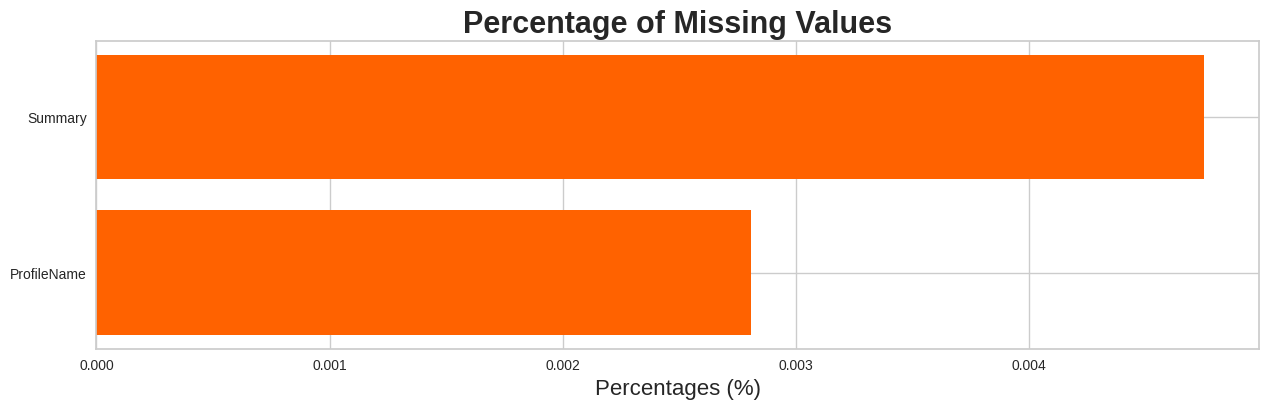

In [9]:
# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

Handling Missing Values Strategy:
CustomerID (24.93% missing values)

The CustomerID column contains nearly a quarter of missing data. This column is essential for clustering customers and creating a recommendation system. Imputing such a large percentage of missing values might introduce significant bias or noise into the analysis.

Moreover, since the clustering is based on customer behavior and preferences, it's crucial to have accurate data on customer identifiers. Therefore, removing the rows with missing CustomerIDs seems to be the most reasonable approach to maintain the integrity of the clusters and the analysis.

Description (0.27% missing values)

The Description column has a minor percentage of missing values. However, it has been noticed that there are inconsistencies in the data where the same StockCode does not always have the same Description. This indicates data quality issues and potential errors in the product descriptions.

Given these inconsistencies, imputing the missing descriptions based on StockCode might not be reliable. Moreover, since the missing percentage is quite low, it would be prudent to remove the rows with missing Descriptions to avoid propagating errors and inconsistencies into the subsequent analyses.

By removing rows with missing values in the CustomerID and Description columns, we aim to construct a cleaner and more reliable dataset, which is essential for achieving accurate clustering and creating an effective recommendation system.

In [10]:
# Removing rows with missing values in 'Summary' and 'ProfileName' columns
product_reviews_df = product_reviews_df.dropna(subset=['Summary', 'ProfileName'])

In [11]:
# Verifying the removal of missing values
product_reviews_df.isnull().sum().sum()

0

In [12]:
# Getting the number of rows in the dataframe
product_reviews_df.shape[0]

568411

43 null value rows have been removed after careful consideration and analysis.

##Step 3.2 | Handling Duplicates

Next, I am going to recognize duplicate rows in the dataset:

In [13]:
# Finding duplicate rows (keeping all instances)
duplicated_rows = product_reviews_df[product_reviews_df.duplicated(keep=False)]
duplicated_rows.sum()

Id                        0.0
ProductId                 0.0
UserId                    0.0
ProfileName               0.0
HelpfulnessNumerator      0.0
HelpfulnessDenominator    0.0
Score                     0.0
Time                      0.0
Summary                   0.0
Text                      0.0
dtype: float64

The given dataset has no duplicate rows to be handled


## Step 3.3 | Converting the data type of Time Variable

In [14]:
from datetime import datetime

product_reviews_df['Time_review'] = pd.to_datetime(product_reviews_df['Time'], unit='s')


In [15]:
#Dropping the Time Column
product_reviews_df.drop('Time',axis=1,inplace=True)

In [16]:
product_reviews_df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Id,568411.0,NaN,NaN,NaN,NaT,NaT,284227.440964,164099.020907,1.0,142114.5,284224.0,426341.5,568454.0
ProductId,568411,74258,B007JFMH8M,913,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UserId,568411,256047,A3OXHLG6DIBRW8,448,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProfileName,568411,218413,"C. F. Hill ""CFH""",451,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HelpfulnessNumerator,568411.0,NaN,NaN,NaN,NaT,NaT,1.743874,7.636781,0.0,0.0,0.0,2.0,866.0
HelpfulnessDenominator,568411.0,NaN,NaN,NaN,NaT,NaT,2.227876,8.288752,0.0,0.0,1.0,2.0,923.0
Score,568411.0,NaN,NaN,NaN,NaT,NaT,4.183309,1.310368,1.0,4.0,5.0,5.0,5.0
Summary,568411,295736,Delicious!,2462,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Text,568411,393565,"This review will make me sound really stupid, ...",199,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_review,568411,3168,2012-10-16 00:00:00,1143,1999-10-08,2012-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
product_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      568411 non-null  int64         
 1   ProductId               568411 non-null  object        
 2   UserId                  568411 non-null  object        
 3   ProfileName             568411 non-null  object        
 4   HelpfulnessNumerator    568411 non-null  int64         
 5   HelpfulnessDenominator  568411 non-null  int64         
 6   Score                   568411 non-null  int64         
 7   Summary                 568411 non-null  object        
 8   Text                    568411 non-null  object        
 9   Time_review             568411 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 47.7+ MB


## Step 3.4 | Exploring the most frequent description used in reviews

Text(0.5, 1.0, 'Top 30 Most Frequent Descriptions')

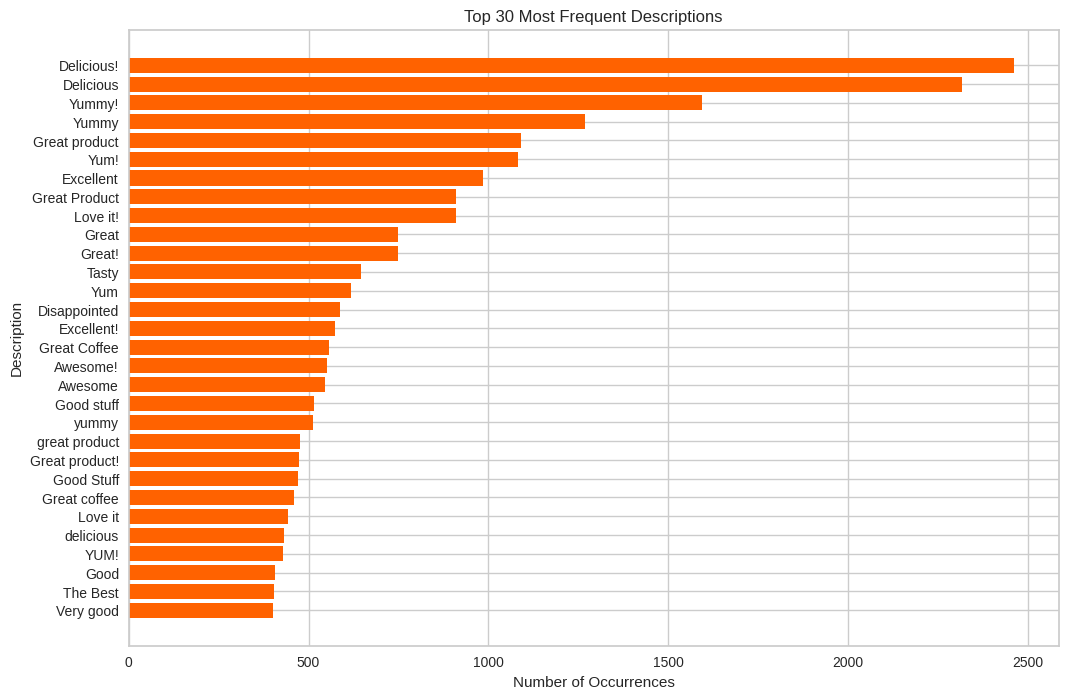

In [18]:
# Calculate the occurrence of each unique description and sort them
description_counts = product_reviews_df['Summary'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')


#**Step-4**

#**EDA**

In [19]:
product_reviews_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Time_review
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21


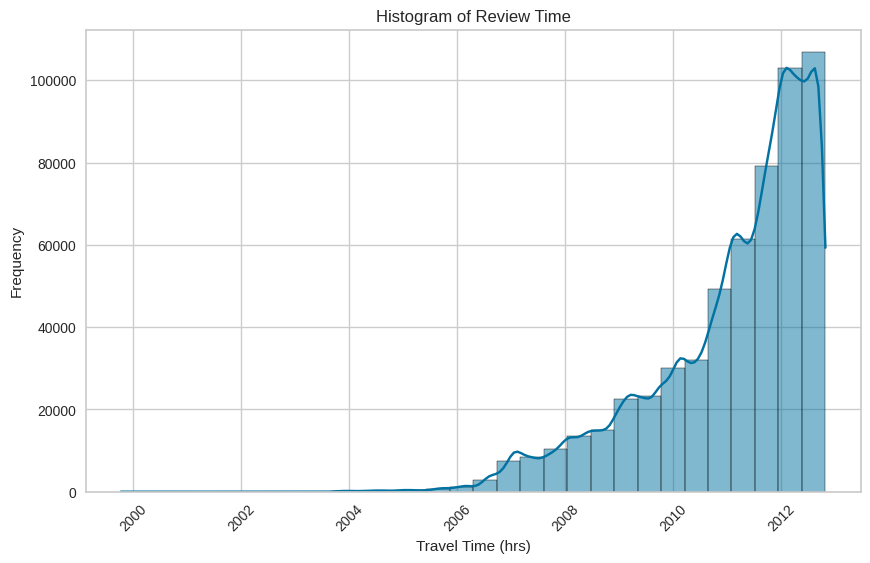

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(product_reviews_df['Time_review'], bins=30, kde=True)
plt.title('Histogram of Review Time')
plt.xlabel('Travel Time (hrs)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

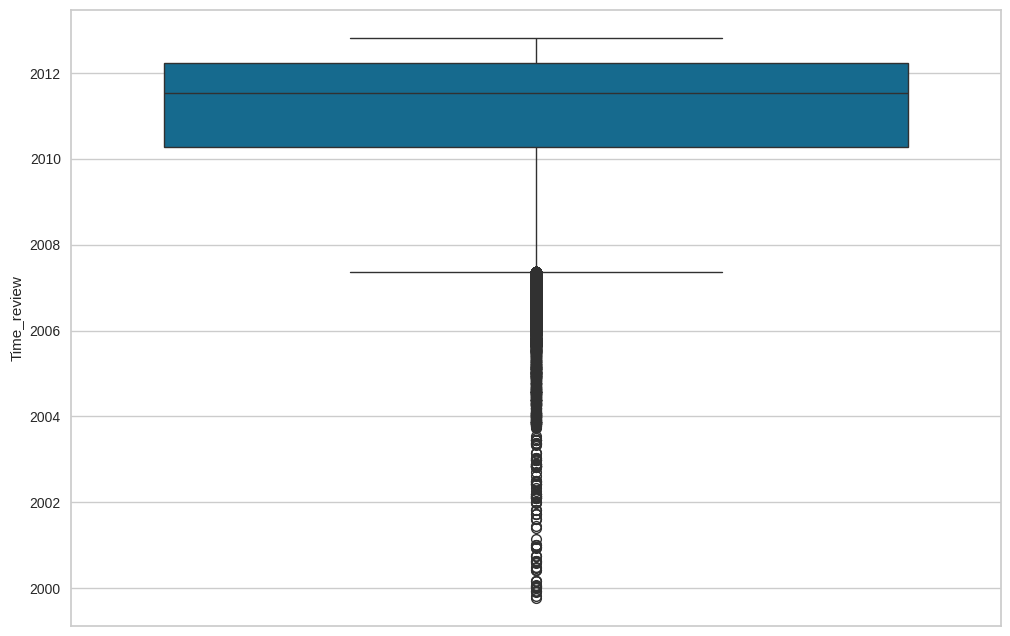

In [21]:
# Plot box plots for numeric columns to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=product_reviews_df['Time_review'])
plt.xticks(rotation=45)
plt.show()

##**Ratings**

 I did extensive analysis on the Ecommerce dataset to understand the data first by plotting major factors into graphs.

Here, we start analyzing the number of ratings vs ratings [1,2,3,4,5 stars]

More than 350,000 users gave the rating for the products as 5 stars.

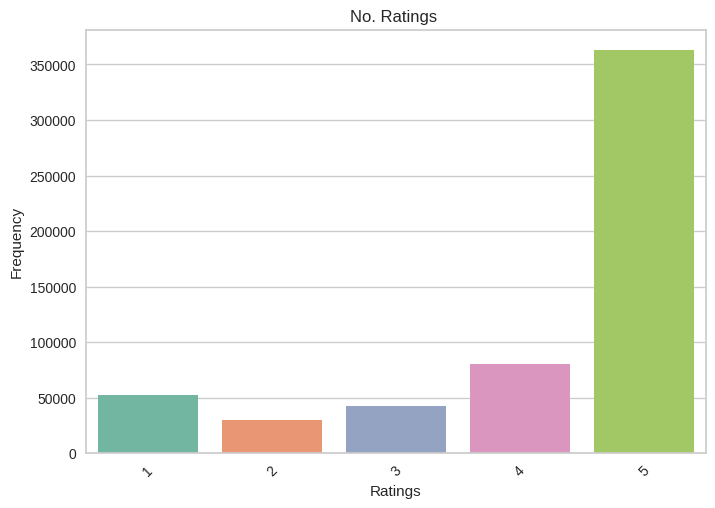

In [22]:
sns.countplot(x='Score',data=product_reviews_df,palette = "Set2")
plt.title('No. Ratings ')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64


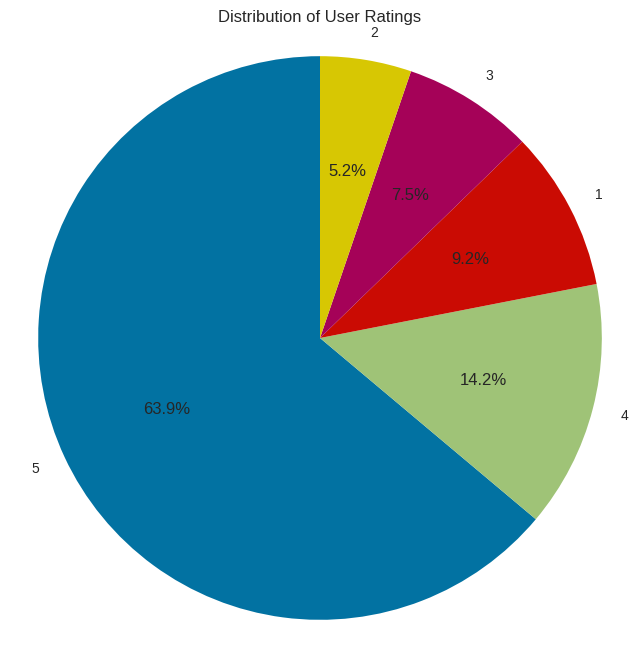

In [23]:
rating_counts = product_reviews_df['Score'].value_counts()

# Display the counts of each class in 'Score'
print(rating_counts)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of User Ratings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [24]:
product_group=pd.DataFrame({'No_of_rating':product_reviews_df.groupby('ProductId').count()['Score'],'Mean_rating':product_reviews_df.groupby('ProductId').mean()['Score']})
product_group

,No_of_rating,Mean_rating
ProductId,,
0006641040,37,4.351351
141278509X,1,5.000000
2734888454,2,3.500000
2841233731,1,5.000000
7310172001,173,4.751445
...,...,...
B009UOFTUI,1,1.000000
B009UOFU20,1,1.000000
B009UUS05I,1,5.000000


Most of the users rated no more than two times. Very few users rated the products more than ten times. This is quite normal in real life, very few users rate multiple items.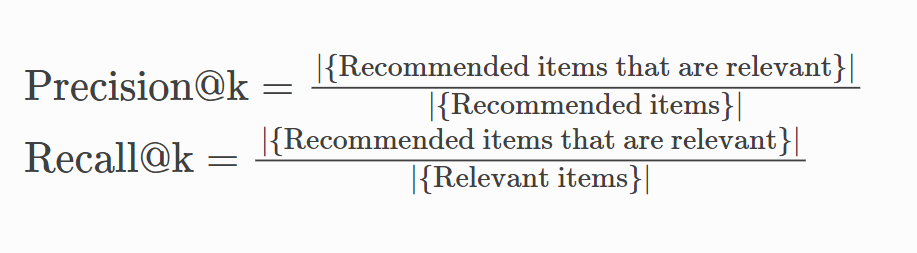

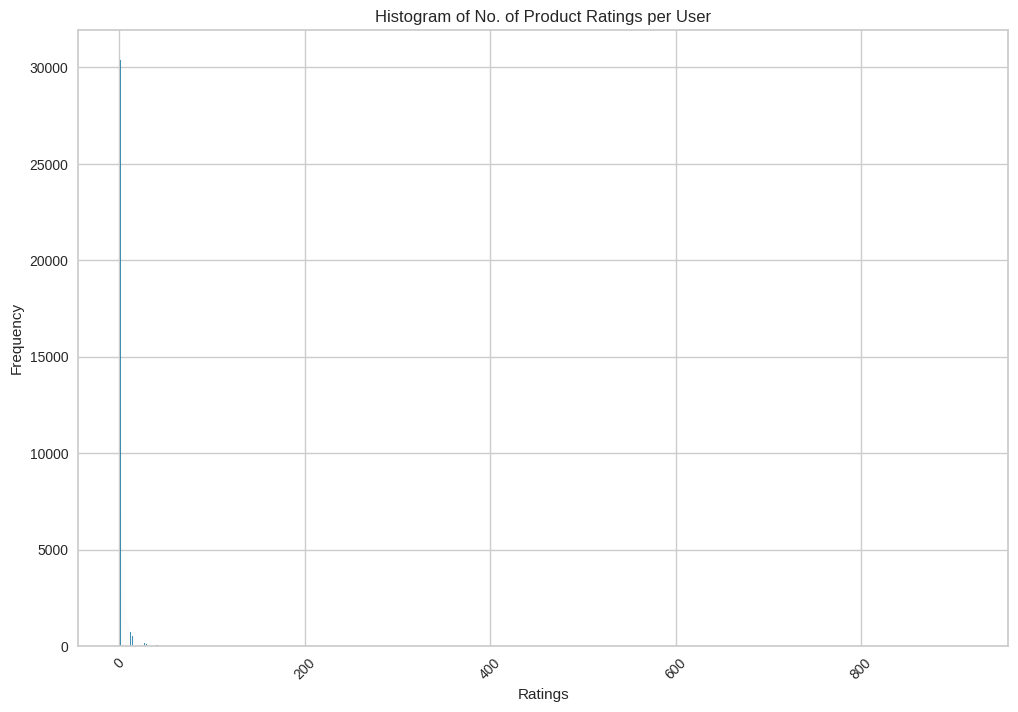

In [25]:
plt.figure(figsize=(12, 8))
sns.histplot(data=product_group['No_of_rating'])
plt.title('Histogram of No. of Product Ratings per User')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

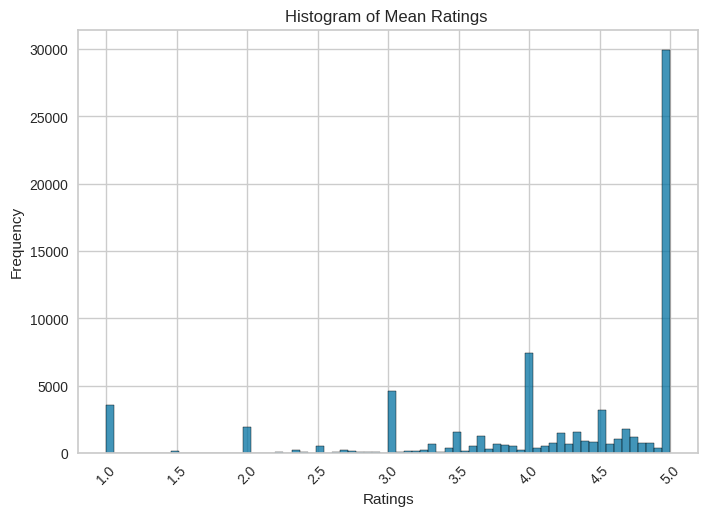

In [26]:
sns.histplot(data=product_group['Mean_rating'],palette = "Set2")
plt.title('Histogram of Mean Ratings ')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


The histogram  illustrates that a significant portion of the user ratings tends to be above the 4-rating threshold. Specifically, there are approximately 30,000 products that have been consistently rated as 5.

To observe the relationship between the Number of Ratings and Mean Rating I created a scatterplot. Most of the users rated the products in the range of 4-5 stars.

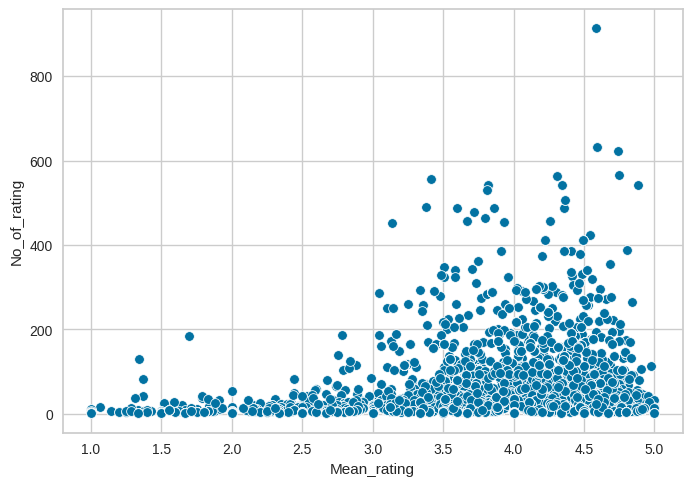

In [27]:
sns.scatterplot(x=product_group['Mean_rating'], y=product_group['No_of_rating'], data=product_group)

# Show the plot
plt.show()

Most of the users rated no more than two times. Very few users rated the products more than ten times. This is quite normal in real life, very few users rate multiple items.

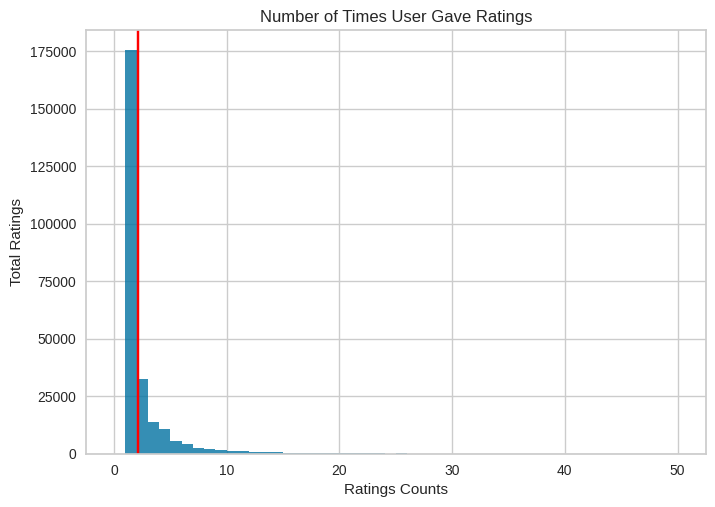

In [28]:
# Group by 'UserId' and calculate the count of scores
user_scores = product_reviews_df.groupby('UserId').size().reset_index(name='scoreCount')

# Filter users with less than 50 ratings
filtered_users = user_scores[user_scores['scoreCount'] < 50]

# Plot histogram and vertical line
plt.hist(filtered_users['scoreCount'], bins=range(0, max(filtered_users['scoreCount']) + 2, 1), alpha=0.8)
plt.axvline(x=filtered_users['scoreCount'].mean(), color='red')

# Set labels and title
plt.xlabel('Ratings Counts')
plt.ylabel('Total Ratings')
plt.title('Number of Times User Gave Ratings')

# Show the plot
plt.show()

Contrary to user interaction, the average count of the product rated is 4.49. It is a good sign as we have more product rated which we can use in our recommender systems.

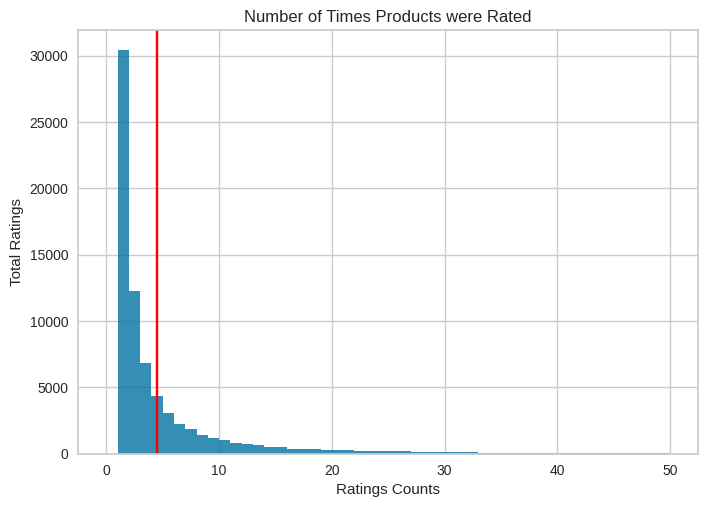

In [29]:
# Group by 'ProductId' and calculate the count of scores
product_scores = product_reviews_df.groupby('ProductId').size().reset_index(name='scoreCount')

# Filter products with less than 50 ratings
filtered_products = product_scores[product_scores['scoreCount'] < 50]

# Plot histogram and vertical line
plt.hist(filtered_products['scoreCount'], bins=range(0, max(filtered_products['scoreCount']) + 2, 1), alpha=0.8)
plt.axvline(x=filtered_products['scoreCount'].mean(), color='red')

# Set labels and title
plt.xlabel('Ratings Counts')
plt.ylabel('Total Ratings')
plt.title('Number of Times Products were Rated')

# Show the plot
plt.show()

When examining the distribution of the frequency with which users rated various products, two observations emerge.

Firstly, irrespective of the number of users who provided ratings, the average rating (or median) consistently lies above 4.

Secondly, users with a lower count of ratings, specifically within the range of 1 to 20 ratings, exhibit a greater variability or spread in their rating scores.

<Axes: xlabel='ratingBucket', ylabel='averageRating'>

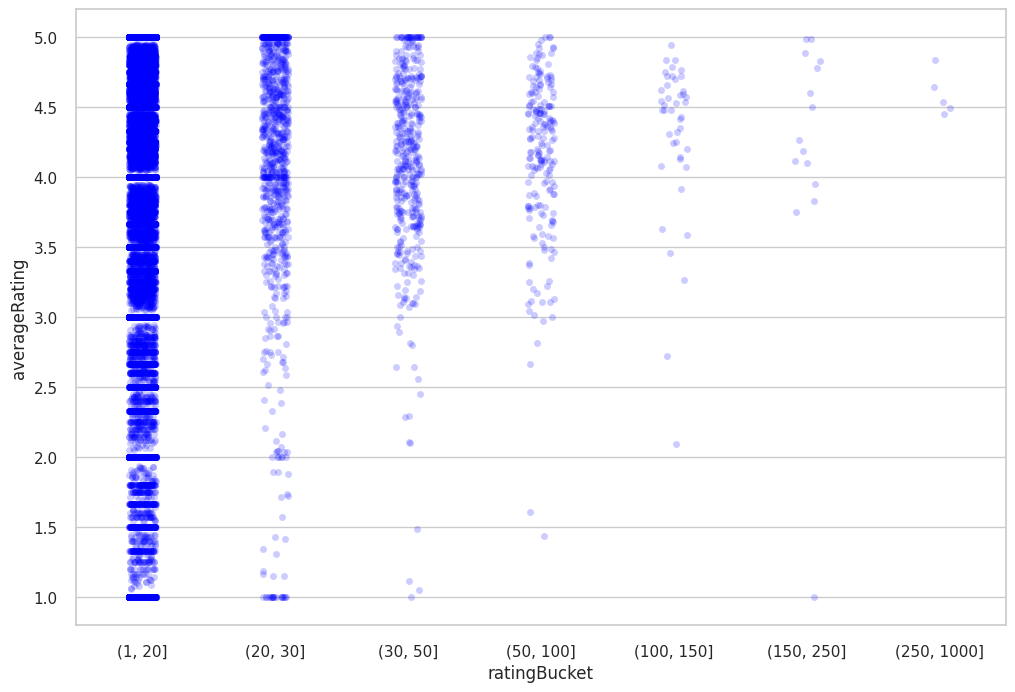

In [30]:
# Group by 'UserId' and calculate totalRatings, averageRating, and medianRating
user_ratings = product_reviews_df.groupby('UserId').agg(totalRatings=('Score', 'count'),
                                          averageRating=('Score', 'mean'),
                                          medianRating=('Score', 'median')).reset_index()

# Create rating buckets using cut
user_ratings['ratingBucket'] = pd.cut(user_ratings['totalRatings'],
                                      bins=[1, 20, 30, 50, 100, 150, 250, 1000])

# Plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Jitter plot
sns.stripplot(x='ratingBucket', y='averageRating', data=user_ratings, color='blue', alpha=0.2)

A comparable pattern is evident at the product level.

Products with fewer ratings tend to exhibit a wider range of scores, indicating that they have received both positive and negative ratings.

This discovery suggests a positive correlation between the number of ratings a product receives and the overall positivity of its rating.

Text(0, 0.5, 'Average Rating')

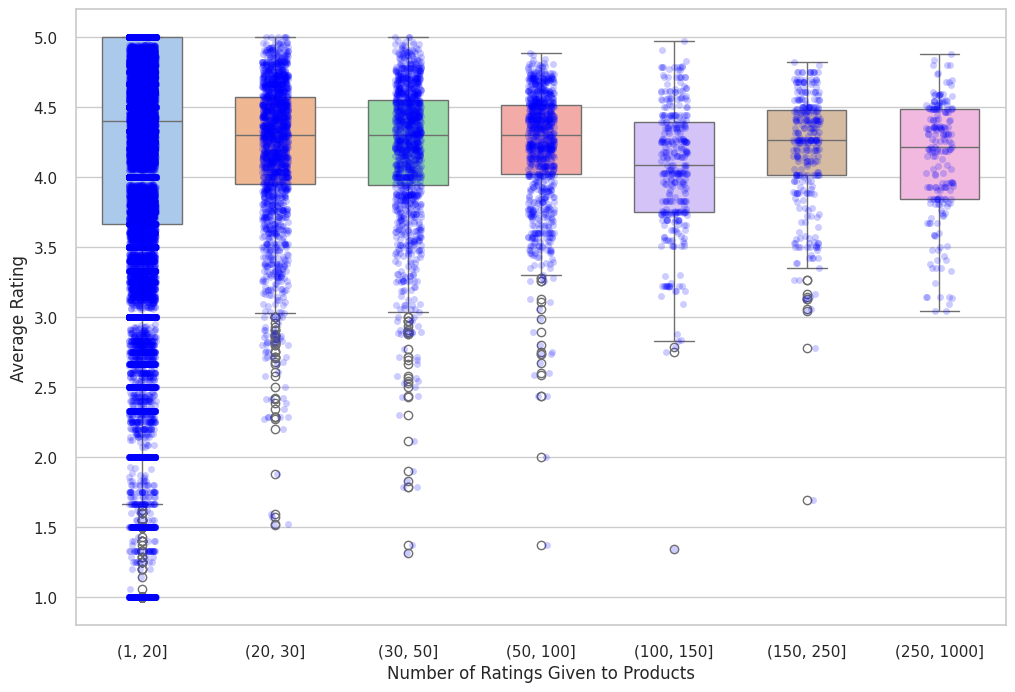

In [31]:
# Group by 'ProductId' and calculate totalRatings, averageRating, and medianRating
product_ratings = product_reviews_df.groupby('ProductId').agg(totalRatings=('Score', 'count'),
                                                averageRating=('Score', 'mean'),
                                                medianRating=('Score', 'median')).reset_index()

# Create rating buckets using cut
product_ratings['ratingBucket'] = pd.cut(product_ratings['totalRatings'],
                                         bins=[1, 20, 30, 50, 100, 150, 250, 1000])

# Plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Jitter plot
sns.stripplot(x='ratingBucket', y='averageRating', data=product_ratings, color='blue', alpha=0.2)

# Boxplot
sns.boxplot(x='ratingBucket', y='averageRating', data=product_ratings, palette="pastel", width=0.6)

# Set labels and title
plt.xlabel('Number of Ratings Given to Products')
plt.ylabel('Average Rating')

#**Step-5**

#**Recommendation System**

In the final phase of this project, I am set to develop a recommendation system to enhance theuser experience. This system will suggest products to customers based on the reviewing patterns prevalent in the data. Earlier in the project, during the customer data preparation stage, I isolated a small fraction (5%) of the customers identified as outliers and reserved them in a separate dataset called outliers_data.

Now, focusing on the core 95% of the customer group, I analyze the cleansed customer data to pinpoint the top-selling products within each cluster. Leveraging this information, the system will craft personalized recommendations, suggesting the top three products popular within their cluster that they have not yet purchased. This not only facilitates targeted marketing strategies but also enriches the personal shopping experience, potentially boosting sales. For the outlier group, a basic approach could be to recommend random products, as a starting point to engage them.

Algorithms

We will train several algorithms to compare their performance to get us the best working model.
We will be using:

Item Based Collaborative Filtering, with Cosine, Pearson, and Euclidean Distance for similarity score.

Single Value Decomposition aka SVD

Alternating Least Squares aka ALS

Popular

Random



We will evaluate how each model performs and select the best working model for our recommender system.

Recommender systems have a problem known as user cold-start, in which it is hard to provide personalized recommendations for users with none or a very few number of consumed items, due to the lack of information to model their preferences.

For this reason, we are keeping in the dataset only users with at least 5 interactions.

Assumptions



1.  We will consider only those UserIds/ Reviewers as geniune users , who have atleast provided reviews/ ratings more than 100 times.
2. We will consider only those ProductsIds for buliding recommedation system, where the minimum number of atleast 2 reviews required per ProductId




For the sake of similarity and to run the model quickly we will only consider users who have rated more than 100 times and products that were rated more than 2 times. Once we build our code structure and understand the flow we can run the same on the entire dataset.

The final dataframe name is final_df

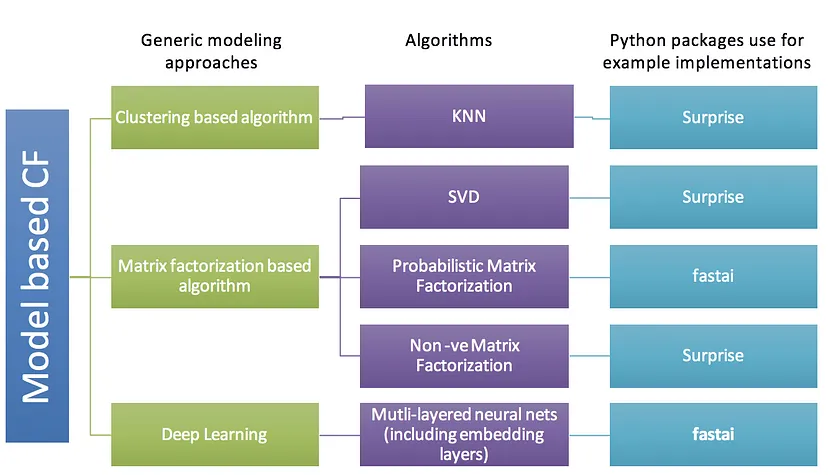

##**Popularity Based Recommender System**
 **(Top 20 Highly Rated Products)**

In [32]:
df=product_reviews_df[['ProductId','UserId','Score']]

In [33]:
df.head()

,ProductId,UserId,Score
0,B001E4KFG0,A3SGXH7AUHU8GW,5
1,B00813GRG4,A1D87F6ZCVE5NK,1
2,B000LQOCH0,ABXLMWJIXXAIN,4
3,B000UA0QIQ,A395BORC6FGVXV,2
4,B006K2ZZ7K,A1UQRSCLF8GW1T,5


In [34]:
food_rating_df=df.groupby('ProductId').count()['Score'].reset_index()
food_rating_df.rename(columns={'Score':'No_of_reviews'},inplace=True)
food_rating_df

,ProductId,No_of_reviews
0,0006641040,37
1,141278509X,1
2,2734888454,2
3,2841233731,1
4,7310172001,173
...,...,...
74253,B009UOFTUI,1
74254,B009UOFU20,1
74255,B009UUS05I,1
74256,B009WSNWC4,1


In [35]:
avg_rating_df=df.groupby('ProductId').mean()['Score'].reset_index()
avg_rating_df.rename(columns={'Score':'Avg_rating'},inplace=True)
avg_rating_df

,ProductId,Avg_rating
0,0006641040,4.351351
1,141278509X,5.000000
2,2734888454,3.500000
3,2841233731,5.000000
4,7310172001,4.751445
...,...,...
74253,B009UOFTUI,1.000000
74254,B009UOFU20,1.000000
74255,B009UUS05I,5.000000
74256,B009WSNWC4,5.000000


In [36]:
popular_df=food_rating_df.merge(avg_rating_df,on='ProductId')
popular_df

,ProductId,No_of_reviews,Avg_rating
0,0006641040,37,4.351351
1,141278509X,1,5.000000
2,2734888454,2,3.500000
3,2841233731,1,5.000000
4,7310172001,173,4.751445
...,...,...,...
74253,B009UOFTUI,1,1.000000
74254,B009UOFU20,1,1.000000
74255,B009UUS05I,1,5.000000
74256,B009WSNWC4,1,5.000000


In [37]:
#Filtering the dataframe by taking into account only those productId having no_of_reviews greater than 250
popular_df[popular_df['No_of_reviews']>250].sort_values('Avg_rating',ascending=False).head(150)

,ProductId,No_of_reviews,Avg_rating
16945,B000NMJWZO,542,4.881919
49159,B003QDRJXY,264,4.837121
56627,B004EAGP74,389,4.802057
11212,B000GAT6NG,389,4.802057
28118,B001E8DHPW,389,4.802057
...,...,...,...
49685,B003TC7WN4,455,3.934066
56851,B004FGWU9O,455,3.934066
50506,B003VXHGPK,455,3.934066
65373,B005HG9ESG,387,3.909561


##**Filtering the records based on our assumptions**

Assumptions

1. We will  consider only those UserIds/ Reviewers as geniune users , who have atleast provided reviews/ ratings more than 50 times.

2. We will consider only those ProductsIds for buliding recommedation system, where the minimum number of atleast 2 reviews required per ProductId

For the sake of similarity and to run the model quickly we will only consider users who have rated more than 30 times and products that were rated more than 100 times. Once we build our code structure and understand the flow we can run the same on the entire dataset.

In [38]:
df.shape

(568411, 3)

In [39]:
users_with_enough_interactions_df=df.groupby('UserId').count()['Score']>20
active_users = users_with_enough_interactions_df[users_with_enough_interactions_df].index
active_users

Index(['A100WO06OQR8BQ', 'A101P2KHWCU0G6', 'A1051DBTLWP5A2', 'A106ZCP7RSXMRU',
       'A1080SE9X3ECK0', 'A10AFVU66A79Y1', 'A10DRHWKS6NQUX', 'A10G136JEISLVR',
       'A10H24TDLK2VDP', 'A10LIGIT9EGCM9',
       ...
       'AZ4QFFUT8QVTA', 'AZ4T61QUJHA9E', 'AZ5X928CQPRJN', 'AZ65W8C4CPKST',
       'AZA595ZPIG240', 'AZNSBRQ0DS8LK', 'AZU4M5K1N2LAB', 'AZV26LP92E6WU',
       'AZWRZZAMX90VT', 'AZXKAH2DE6C8A'],
      dtype='object', name='UserId', length=1702)

In [40]:
filtered_users = df[df['UserId'].isin(active_users)]
filtered_users

,ProductId,UserId,Score
14,B001GVISJM,A2MUGFV2TDQ47K,5
18,B001GVISJM,A2A9X58G2GTBLP,5
44,B001EO5QW8,A2G7B7FKP2O2PU,5
46,B001EO5QW8,AQLL2R1PPR46X,5
73,B0059WXJKM,A25VFHVGI4CFTP,1
...,...,...,...
568367,B000LKVRQA,AYB4ELCS5AM8P,5
568397,B001EQ5O6Y,AWLK6NSSV0YNA,5
568424,B001FPT1WM,A291HTT117RVS9,5
568428,B001FPT1WM,A1YGG6T4YJZWC1,5


In [41]:
filtered_users.groupby('ProductId').count()['Score'].value_counts()

1      12159
2       3065
3       1185
4        648
5        361
       ...  
96         1
64         1
56         1
109        1
85         1
Name: Score, Length: 104, dtype: int64

In [42]:
filtered_product = filtered_users.groupby('ProductId').count()['Score']>16
famous_products = filtered_product[filtered_product].index


In [43]:
final_df = filtered_users[filtered_users['ProductId'].isin(famous_products)]
final_df.head(10)

,ProductId,UserId,Score
422,B000G6RYNE,A2NO1TXXS9T0EE,4
423,B000G6RYNE,A1IRN1M05TPOVT,5
425,B000G6RYNE,A1Y3XPZK9ZADFW,4
426,B000G6RYNE,A1Y3XPZK9ZADFW,4
429,B000G6RYNE,A1IRN1M05TPOVT,5
431,B000G6RYNE,A2OEUROGZDTXUJ,5
433,B000G6RYNE,A22PUBSSNP54L,5
434,B000G6RYNE,A15USNEAJUXOSH,4
435,B000G6RYNE,A15USNEAJUXOSH,5
436,B000G6RYNE,A2BLJGGWN8GTXQ,5


##**Recommendation of products based on cosine similarity score**

In [44]:
pt = final_df.pivot_table(index='ProductId',columns='UserId',values='Score')
pt.fillna(0,inplace=True)
pt

UserId,A100WO06OQR8BQ,A101P2KHWCU0G6,A1051DBTLWP5A2,A106ZCP7RSXMRU,A10AFVU66A79Y1,A10G136JEISLVR,A10H24TDLK2VDP,A10LIGIT9EGCM9,A10PEXB6XAQ5XF,A10PJEHY3JKKQG,...,AYPEPA3VS4KDM,AYWUHB7N8XGZQ,AZ4IFJ01WKBTB,AZ4QFFUT8QVTA,AZ4T61QUJHA9E,AZ5X928CQPRJN,AZA595ZPIG240,AZNSBRQ0DS8LK,AZU4M5K1N2LAB,AZWRZZAMX90VT
ProductId,,,,,,,,,,,,,,,,,,,,,
B000084DWM,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000084EZ4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00008CQVA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00014DXCC,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0
B00020HHAO,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B008RWUHA6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B008RWUKXK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B0090X8IPM,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(pt)
similarity_scores.shape

(539, 539)

In [46]:
def recommend(product_Id):
    # index fetch
    index = np.where(pt.index==product_Id)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]

    data = []
    for i in similar_items:
        item = []
        temp_df = product_reviews_df[product_reviews_df['ProductId'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('ProductId')['ProductId'].values))
        item.extend(list(temp_df.drop_duplicates('ProductId')['Summary'].values))
        item.extend(list(temp_df.drop_duplicates('ProductId')['Score'].values))


        data.append(item)

    return data

In [47]:
recommend('B000G6RYNE')

[['B000G6O2QG', 'GREAT DEAL', 5],
 ['B000G6RYNE', 'Hard', 4],
 ['B000LKVD5U', 'Hard', 4],
 ['B000LKXBL4', 'Hard', 4],
 ['B0012XBD7I', 'GREAT DEAL', 5]]

##**Model Based Approach**
**Using KNN Algorithm & Suprise Python Package**

To model assessment, we will be using cross-validation with three iterations. Also, we have set good ratings to be 4.

In [48]:
!pip install scikit-surprise==1.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp310-cp310-linux_x86_64.whl size=2050977 sha256=2a6da216701edf362652822a41275825690aeb240d76778ae03e6da1ca4017eb
  Stored in directory: /root/.cache/pip/wheels/14/e3/9f/653d3704a5542efd9637961ecce07b6c42008ca912881c1828
Successfully built scikit-surprise


In [49]:
#Importing neccessary surprise Libraries
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split, cross_validate
from surprise import KNNBaseline
from surprise.model_selection import GridSearchCV
from surprise import NormalPredictor, SVD, NMF, SlopeOne,KNNBasic


##**Fitting the best KNN Model Parameters**

In [50]:
# Load your dataset into a Surprise dataset
reader = Reader(rating_scale=(1, 5))  # Adjust the rating scale as needed
data = Dataset.load_from_df(final_df[['UserId', 'ProductId', 'Score']], reader)

In [51]:
# Create a KNNBasic algorithm instance
knn_basic = KNNBaseline()

# Specify the parameter grid

# we are trying with different algo like cosine,pearson,msd n pearson_baseline,whichever algo gives best result will be considered for training and buliding recommendation model

param_grid = {
    'k': [20, 30, 40],                # Number of neighbors
    'sim_options': {
        'name': ['cosine', 'pearson','msd','pearson_baseline'],
        'min_support': [3,4,5],
        'user_based': [True, False]     # User-based or item-based
    }
}

# Create a GridSearchCV Object

"""In this code snippet, GridSearchCV is configured to perform 3-fold cross-validation (cv=3).
 When you call grid_search.fit(data), it internally splits the data into three folds,
trains the algorithm on different combinations of hyperparameters,
and evaluates their performance using the specified measure (in this case, RMSE)."""

grid_search = GridSearchCV(KNNBasic, param_grid, measures=['RMSE'], cv=3)

# Fit the grid search to the data
grid_search.fit(data)

# Get the best parameters
best_params = grid_search.best_params['rmse']
print("Best Parameters:", best_params)



Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [52]:
print("Best Parameters:", best_params)

# Fit/Train the model with the best parameters
knn_algorithm = KNNBaseline(k=best_params['k'], sim_options=best_params['sim_options'], user_based=False)

Best Parameters: {'k': 40, 'sim_options': {'name': 'pearson_baseline', 'min_support': 3, 'user_based': False}}


##**Recommending products to Customer using KNN**

In [53]:
#from surprise import KNNBaseline  # Replace with the appropriate collaborative filtering algorithm
#from surprise import Dataset, Reader
#from surprise.model_selection import train_test_split

def train_model_and_get_recommendations(data, algo=KNNBaseline(), user_id=None, n_recommendations=5):
    """
    Train a collaborative filtering model on the provided dataset and get recommendations for a user.

    Parameters:
    - data: Surprise Dataset
    - algo: Collaborative filtering algorithm (default: KNNBaseline())
    - user_id: ID of the user for whom recommendations are needed
    - n_recommendations: Number of recommendations to provide (default: 5)

    Returns:
    - List of tuples (product_id, predicted_score) representing recommended products and their predicted scores.
    """

    # Train the model on the full dataset
    trainset = data.build_full_trainset()
    algo.fit(trainset)

    # Get recommendations for the specified user
    if user_id is not None:
        # Create a list of all product IDs
        all_product_ids = trainset.all_items()

        # Remove products that the user has already rated
        rated_products = [item[0] for item in trainset.ur[trainset.to_inner_uid(user_id)]]
        available_products = list(set(all_product_ids) - set(rated_products))
        user_id_new=trainset.to_inner_uid(user_id)
        # Make predictions for the available products
        predictions = [(trainset.to_raw_iid(item_id), algo.predict(trainset.to_raw_uid(user_id_new), trainset.to_raw_iid(item_id)).est)
                       for item_id in available_products]

        # Sort the predictions by score in descending order
        sorted_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)

        # Return the top n_recommendations recommendations
        return sorted_predictions[:n_recommendations]
    else:
        print("Please provide a user_id for recommendations.")



# Replace KNNBaseline() with the collaborative filtering algorithm of your choice
recommendations = train_model_and_get_recommendations(data, algo=knn_algorithm, user_id='A1Y3XPZK9ZADFW', n_recommendations=5)
knn_reccom_engine = pd.DataFrame(recommendations, columns=['Reccomend_ProductId', 'Rating'])
knn_reccom_engine


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


,Reccomend_ProductId,Rating
0,B001EO5Q64,4.585529
1,B000V17MLS,4.540058
2,B000H7LVKY,4.513997
3,B001HN5Z4K,4.509303
4,B008J1HO4C,4.498477


In [54]:
from collections import defaultdict




def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# First train an SVD algorithm on the movielens dataset.
#data = Dataset.load_builtin("ml-100k")
#trainset = data.build_full_trainset()
# Split the data into training and testing sets
reader = Reader(rating_scale=(1, 5))  # Assuming your ratings are on a scale from 1 to 5
data = Dataset.load_from_df(final_df[['UserId', 'ProductId', 'Score']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
algo = knn_algorithm
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)
top_n_product_reccom_knn=pd.DataFrame(top_n)
top_n_product_reccom_knn[:5]
# Print the recommended items for each user
#for uid, user_ratings in top_n.items():
    #print(uid, [iid for (iid, _) in user_ratings])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


,A1DH3QDZX8Z7GO,A3M8R4JD1SIS76,A2N2X7L7LB3S6X,AQLL2R1PPR46X,A1OL6OBZGR6RGB,AJD41FBJD9010,A36JDIN9RAAIEC,A241HDIOHZJRBR,A3LCQXQ4SFYBAU,A2AY4YUOX2N1BQ,...,A2B7BUH8834Y6M,A38O3HBCYKNZ2N,A3CW0ZLUO5X2B1,A1TIVD0Y3KJSCN,A3173BUN91R8RF,A13E0ARAXI6KJW,A18LN2FR7EHDYM,A1DJ9FOEOA0WF1,A37AO20OXS51QA,A3LH77PBDFEO3F
0,"(B005K4Q1VI, 5)","(B007JT7ARQ, 5)","(B000H7LVKY, 4.652063803137294)","(B005QRPH78, 5)","(B000H7LVKY, 4.454945377394798)","(B007JT7ARQ, 5)","(B007JT7ARQ, 5)","(B0051COPH6, 5)","(B000H7LVKY, 4.954871446504191)","(B000H7LVKY, 4.456263143217816)",...,"(B001HN5Z4K, 4.9785808524261705)","(B000H7LVKY, 4.646716958933701)","(B000H7LVKY, 4.628003190520691)","(B001HN5Z4K, 5)","(B000HDI5O8, 4.812708282194675)","(B000H7LVKY, 4.614494197503814)","(B003D4F1QS, 4.9731497872418915)","(B0015MY6PC, 5)","(B0007A0AQW, 5)","(B000H7LVKY, 4.593110482761791)"
1,"(B000FA38ZY, 5)","(B0015MY6PC, 5)","(B001HN5Z4K, 4.642428572458892)","(B000P52FLW, 5)","(B001HN5Z4K, 4.445310146716396)","(B0007A0AQW, 5)","(B001EQ4QJK, 5)","(B003JA5KLM, 5)","(B001HN5Z4K, 4.945236215825789)","(B001HN5Z4K, 4.446627912539415)",...,"(B008J1HO4C, 4.967243856227178)","(B001HN5Z4K, 4.637081728255299)","(B001HN5Z4K, 4.618367959842289)","(B0045XE32E, 4.931419675709672)","(B000H7LVKY, 4.649593936320211)","(B008J1HO4C, 4.593521970626419)","(B0045XE32E, 4.933412490912752)","(B00472I5A4, 5)","(B006J4MAIQ, 5)","(B001HN5Z4K, 4.583475252083389)"
2,"(B004HOLD92, 5)","(B005QRPH78, 5)","(B008J1HO4C, 4.631091576259899)","(B0051COPH6, 5)","(B008J1HO4C, 4.433973150517403)","(B0026KPDG8, 5)","(B0015MY6PC, 5)","(B000WFSKK0, 5)","(B008J1HO4C, 4.933899219626796)","(B008J1HO4C, 4.4352909163404215)",...,"(B000V17MLS, 4.915528966626361)","(B008J1HO4C, 4.625744732056306)","(B0051COPH6, 4.6156792093620425)","(B007PE7ANY, 4.913521299474183)","(B001HN5Z4K, 4.639958705641809)","(B001HN5Z4K, 4.56573682444683)","(B003D4MW38, 4.9318063050394825)","(B005QRPH78, 5)","(B000YSTIL0, 5)","(B008J1HO4C, 4.572138255884396)"
3,"(B005K4Q1T0, 5)","(B0007A0AQW, 5)","(B000V17MLS, 4.579376686659082)","(B001E5E1WS, 5)","(B000V17MLS, 4.382258260916586)","(B007M83302, 5)","(B000WFPH5G, 5)","(B000WFGOX0, 4.963073940514)","(B000V17MLS, 4.8821843300259795)","(B000V17MLS, 4.383576026739606)",...,"(B001EO5U3I, 4.8713416158900715)","(B000V17MLS, 4.57402984245549)","(B008J1HO4C, 4.607030963643297)","(B005QRPHPU, 4.90436674941344)","(B008J1HO4C, 4.628621709442816)","(B000V17MLS, 4.541807081025603)","(B000P52FLW, 4.80105124929472)","(B000G6O2QG, 5)","(B006J4MAUE, 5)","(B000V17MLS, 4.5204233662835795)"
4,"(B005K4Q68Q, 5)","(B000Q5X8DK, 5)","(B001EO5Q64, 4.561127565133875)","(B000XSJLW2, 5)","(B001EO5Q64, 4.364009139391379)","(B000YSTIL0, 5)","(B002TMV3CG, 5)","(B000OH57ZW, 4.945199624719395)","(B001EO5Q64, 4.863935208500772)","(B001EO5Q64, 4.365326905214397)",...,"(B0054TWQMM, 4.868249769462895)","(B0034EDMCW, 4.543879791705717)","(B000V17MLS, 4.55531607404248)","(B005QRPH78, 4.871105254926406)","(B001BCXTGS, 4.623116475902727)","(B001EO5Q64, 4.523557959500395)","(B000E4ALHY, 4.776149493987373)","(B006Q7YG2O, 5)","(B004FEN3GK, 5)","(B001EO5Q64, 4.502174244758372)"


##**Evaluation of KNN Recommendation System**

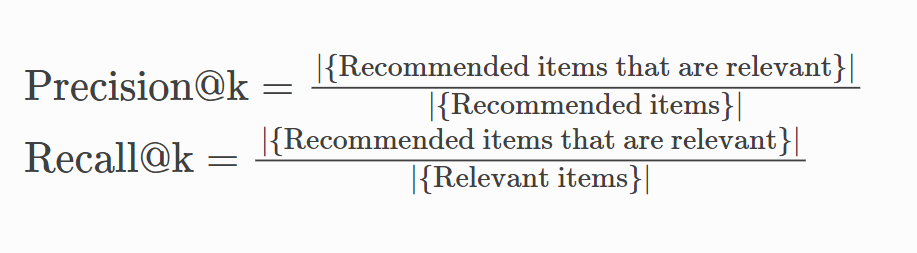



Explanation:

predictions: It represents a list of prediction objects. Each prediction object typically contains information about a user, an item, the actual rating (r_ui), and the estimated rating (est) by the recommendation system.

threshold: It defines the minimum rating that is considered relevant. Items with a rating greater than or equal to this threshold are considered relevant.

relevant_items: This set is constructed from the predictions, including only items that were actually rated by the user and are considered relevant based on the provided threshold.

top_k_predictions: The list of predictions is sorted in descending order based on the estimated ratings (est). The top k predictions are then selected.

recommended_items: This set contains the items recommended by the system in the top k predictions.

intersection: It represents the set of items that are both relevant and recommended.

recall: The recall is calculated as the ratio of the number of relevant items recommended to all relevant items. If there are no relevant items, the recall is set to 0.

In summary, the recall_at_k function evaluates how well a recommendation system is performing by measuring the proportion of relevant items that were successfully recommended within the top k predictions. The higher the recall, the better the system is at capturing relevant items.

In [55]:
from surprise import accuracy
# Create a Surprise Reader and Dataset
reader = Reader(rating_scale=(1, 5))  # Assuming your ratings are on a scale from 1 to 5
data = Dataset.load_from_df(final_df[['UserId', 'ProductId', 'Score']], reader)

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)
predictions = knn_algorithm.test(test)
rmse = accuracy.rmse(predictions)

print(f"KNN - RMSE for 5 recommendations: {rmse}")

RMSE: 0.6516
KNN - RMSE for 5 recommendations: 0.6515690228411636


In [56]:
from collections import defaultdict

from surprise import Dataset, SVD
from surprise.model_selection import KFold


def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls


reader = Reader(rating_scale=(1, 5))  # Adjust the rating scale as needed
data = Dataset.load_from_df(final_df[['UserId', 'ProductId', 'Score']], reader)
kf = KFold(n_splits=5)
algo = knn_algorithm

for j in range(1, 6):
    precisions = {}
    recalls = {}

    for trainset, testset in kf.split(data):
      algo.fit(trainset)
      predictions = algo.test(testset)
      precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users


    print(f"Precision for {j} recommendations:  {sum(prec for prec in precisions.values()) / len(precisions)}")
    print(f"Recall for {j} recommendations: {sum(rec for rec in recalls.values()) / len(recalls)}")



Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Precision for 1 recommendations:  0.7319575471698113
Recall for 1 recommendations: 0.602671023917173
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix.

#**Matrix Factorization SVD (Model Based /Item Based Approach)**

Matrix factorization is a sub section of collaborative filtering. Matrix factorization work by reducing the user-item interaction matrix into the product of two lower dimensionality rectangular matrices. Advantage of utilizing this approach is that rather than having a multi dimensional matrix with huge number of missing values, now we will be having smaller matrix in lower-dimensional space. [3]
There are several advantages with this method. It handles the sparsity of the original matrix better than memory based ones. Also comparing similarity on the resulting matrix is much more reliable especially in dealing with large sparse datasets.

We will start loading the dataset using Dataset.load_from_df.

Observe the K Fold Cross validation result values MSE [Mean Squared Error], RMSE [Root Mean Squared Error]

We get a mean Root Mean Squared Error of 0.76 approx. which is good enough for our case.

##**Importing Neccessary Lib for model based approach**

In [57]:
from surprise import accuracy
from surprise.model_selection import KFold
from surprise import NormalPredictor, SVD, NMF, KNNBasic, SlopeOne


reader = Reader(rating_scale=(1, 5))  # Adjust the rating scale as needed
data = Dataset.load_from_df(final_df[['UserId', 'ProductId', 'Score']], reader)
data


##**Fitting the best SVD Model Parameters**

In [58]:
# Create an instance of the SVD algorithm
svd_algorithm = SVD()

# Specify the parameter grid
param_grid = {
    'n_epochs': [5, 10, 15],
    'lr_all': [0.03, 0.05],
    'reg_all': [0.4, 0.6]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(SVD, param_grid, measures=['RMSE'], cv=3)

# Fit the grid search to the data
grid_search.fit(data)

# Get the best parameters
best_params = grid_search.best_params['rmse']
print("Best Parameters:", best_params)

# Train the final model with the best parameters
final_svd_model = SVD(n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])

Best Parameters: {'n_epochs': 15, 'lr_all': 0.05, 'reg_all': 0.4}


##**Recommending products to Customer using SVD**

In [59]:
def train_model_and_get_recommendations(data, algo=SVD(), user_id=None, n_recommendations=5):
    """
    Train a collaborative filtering model on the provided dataset and get recommendations for a user.

    Parameters:
    - data: Surprise Dataset
    - algo: Collaborative filtering algorithm (default: SVD)
    - user_id: ID of the user for whom recommendations are needed
    - n_recommendations: Number of recommendations to provide (default: 5)

    Returns:
    - List of tuples (product_id, predicted_score) representing recommended products and their predicted scores.
    """

    # Train the model on the full dataset
    trainset = data.build_full_trainset()
    algo.fit(trainset)

    # Get recommendations for the specified user
    if user_id is not None:
        # Create a list of all product IDs
        all_product_ids = trainset.all_items()

        # Remove products that the user has already rated
        rated_products = [item[0] for item in trainset.ur[trainset.to_inner_uid(user_id)]]
        available_products = list(set(all_product_ids) - set(rated_products))
        user_id_new=trainset.to_inner_uid(user_id)
        # Make predictions for the available products
        predictions = [(trainset.to_raw_iid(item_id), algo.predict(trainset.to_raw_uid(user_id_new), trainset.to_raw_iid(item_id)).est)
                       for item_id in available_products]

        # Sort the predictions by score in descending order
        sorted_predictions = sorted(predictions, key=lambda x: x[1], reverse=True)

        # Return the top n_recommendations recommendations
        return sorted_predictions[:n_recommendations]
    else:
        print("Please provide a user_id for recommendations.")

# Example usage:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(final_df[['UserId', 'ProductId', 'Score']], reader)

# Replace SVD() with the collaborative filtering algorithm of your choice
recommendations = train_model_and_get_recommendations(data, algo=final_svd_model, user_id='A2NO1TXXS9T0EE', n_recommendations=5)
svd_reccom_engine = pd.DataFrame(recommendations, columns=['Reccomend_ProductId', 'Rating'])
svd_reccom_engine


,Reccomend_ProductId,Rating
0,B000V17MLS,4.751643
1,B0054TWQMM,4.739135
2,B000H7LVKY,4.719351
3,B001EO5Q64,4.716771
4,B005NVU5BK,4.708699


How to get the top-N recommendations for each user

Here is an example where we retrieve the top-10 items with highest rating prediction for each user.

 We first train an SVD algorithm on the whole dataset, and then predict all the ratings for the pairs (user, item) that are not in the training set. We then retrieve the top-10 prediction for each user.



In [60]:
reader = Reader(rating_scale=(1, 5))  # Assuming your ratings are on a scale from 1 to 5
data = Dataset.load_from_df(final_df[['UserId', 'ProductId', 'Score']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
algo = final_svd_model
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)
top_n_product_reccom_svd=pd.DataFrame(top_n)
top_n_product_reccom_svd[:5]
# Print the recommended items for each user
#for uid, user_ratings in top_n.items():
    #print(uid, [iid for (iid, _) in user_ratings])

,A1DH3QDZX8Z7GO,A3M8R4JD1SIS76,A2N2X7L7LB3S6X,AQLL2R1PPR46X,A1OL6OBZGR6RGB,AJD41FBJD9010,A36JDIN9RAAIEC,A241HDIOHZJRBR,A3LCQXQ4SFYBAU,A2AY4YUOX2N1BQ,...,A2B7BUH8834Y6M,A38O3HBCYKNZ2N,A3CW0ZLUO5X2B1,A1TIVD0Y3KJSCN,A3173BUN91R8RF,A13E0ARAXI6KJW,A18LN2FR7EHDYM,A1DJ9FOEOA0WF1,A37AO20OXS51QA,A3LH77PBDFEO3F
0,"(B000H7LVKY, 4.3401410510974205)","(B0051COPH6, 5)","(B000H7LVKY, 4.762523038351073)","(B000H7LVKY, 4.828686624686964)","(B000H7LVKY, 4.442106915609711)","(B000H7LVKY, 4.480771569663422)","(B007JT7ARQ, 5)","(B0051COPH6, 5)","(B001HN5Z4K, 5)","(B000H7LVKY, 4.448595685617262)",...,"(B000H7LVKY, 4.764460623713008)","(B000H7LVKY, 4.859339907565741)","(B000H7LVKY, 4.793680197488458)","(B000H7LVKY, 4.793464912652494)","(B000H7LVKY, 4.906154954782503)","(B000H7LVKY, 4.669216709131971)","(B000H7LVKY, 4.979044276513981)","(B0051COPH6, 5)","(B001HN5Z4K, 5)","(B000H7LVKY, 4.4956152940651775)"
1,"(B001HN5Z4K, 4.2599873968582695)","(B007PE7ANY, 5)","(B001HN5Z4K, 4.684230643537857)","(B001HN5Z4K, 4.751316134295384)","(B001HN5Z4K, 4.363735164600677)","(B001HN5Z4K, 4.403363418805332)","(B0029NVJX8, 5)","(B001HN5Z4K, 5)","(B000V17MLS, 5)","(B001HN5Z4K, 4.370516939324089)",...,"(B001HN5Z4K, 4.675715661630286)","(B001HN5Z4K, 4.785533094321422)","(B001HN5Z4K, 4.714271625602042)","(B001HN5Z4K, 4.721725785810808)","(B001HN5Z4K, 4.819661894198575)","(B001HN5Z4K, 4.600457775931807)","(B001HN5Z4K, 4.908822954102187)","(B001HN5Z4K, 5)","(B000V17MLS, 5)","(B001HN5Z4K, 4.417337135859134)"
2,"(B000V17MLS, 4.237155896169916)","(B001HN5Z4K, 5)","(B000V17MLS, 4.666861297635718)","(B0051COPH6, 4.714482452508002)","(B000V17MLS, 4.346583831408207)","(B000V17MLS, 4.378392680626166)","(B0034EDMLI, 5)","(B0054TWQMM, 5)","(B000H7LVKY, 5)","(B000V17MLS, 4.35270642222203)",...,"(B000V17MLS, 4.658918735105598)","(B000V17MLS, 4.760649751181019)","(B000V17MLS, 4.692454624737806)","(B000V17MLS, 4.699850594030551)","(B000V17MLS, 4.804223066082556)","(B000V17MLS, 4.576041150044309)","(B000V17MLS, 4.894844814154349)","(B0054TWQMM, 5)","(B000H7LVKY, 5)","(B000V17MLS, 4.41505856038927)"
3,"(B0054TWQMM, 4.21843229180966)","(B0054TWQMM, 5)","(B0054TWQMM, 4.645222417266054)","(B001EO5Q64, 4.708479044002049)","(B0054TWQMM, 4.324775477277195)","(B0051COPH6, 4.361249022023558)","(B005QRPH78, 5)","(B001EO5Q64, 5)","(B0054TWQMM, 4.995003507745091)","(B0054TWQMM, 4.3309037361458715)",...,"(B0054TWQMM, 4.657365278950045)","(B0051COPH6, 4.749272779783941)","(B0054TWQMM, 4.682206367717296)","(B001EO5Q64, 4.684607855297433)","(B0054TWQMM, 4.7948220306694695)","(B0051COPH6, 4.557891425251798)","(B0054TWQMM, 4.873318258168297)","(B001EO5Q64, 5)","(B0034EFIYC, 4.998006836103776)","(B0054TWQMM, 4.396178882110029)"
4,"(B0051COPH6, 4.217952815310542)","(B001EO5Q64, 5)","(B0051COPH6, 4.644063634865161)","(B0054TWQMM, 4.70429747355495)","(B0051COPH6, 4.3236056284125945)","(B001EO5Q64, 4.350698481280789)","(B0029NVJ4M, 5)","(B000V17MLS, 5)","(B0051COPH6, 4.994266629105632)","(B0051COPH6, 4.330122610701654)",...,"(B001EO5Q64, 4.64491413095177)","(B0054TWQMM, 4.732732836655701)","(B0051COPH6, 4.676971063724927)","(B0051COPH6, 4.6831127655672065)","(B0034EFIYC, 4.785770687605446)","(B001EO5Q64, 4.550597542090313)","(B0034EFIYC, 4.870722835232677)","(B000V17MLS, 5)","(B0051COPH6, 4.995896500205741)","(B0051COPH6, 4.383025485889129)"


##**SVD Evaluation**

How to compute precision@k and recall@k
Here is an example where we compute Precision@k and Recall@k for each user:





An item is considered relevant if its true rating
 is greater than a given threshold. An item is considered recommended if its estimated rating
 is greater than the threshold, and if it is among the k highest estimated ratings.

Note that in the edge cases where division by zero occurs, Precision@k and Recall@k values are undefined. As a convention, we set their values to 0 in such cases.

In [61]:
# Create a Surprise Reader and Dataset
reader = Reader(rating_scale=(1, 5))  # Assuming your ratings are on a scale from 1 to 5
data = Dataset.load_from_df(final_df[['UserId', 'ProductId', 'Score']], reader)

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)
predictions = final_svd_model.test(test)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)
print(f"SVD - RMSE for 5 recommendations: {rmse}")
print(f"SVD - MAE for 5 recommendations: {mae}")

RMSE: 0.7743
MAE:  0.5748
SVD - RMSE for 5 recommendations: 0.7742874203662319
SVD - MAE for 5 recommendations: 0.5747862016752298


In [62]:
from collections import defaultdict

from surprise import Dataset, SVD
from surprise.model_selection import KFold


def precision_recall_at_k(predictions, k=10, threshold=4):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls


reader = Reader(rating_scale=(1, 5))  # Assuming your ratings are on a scale from 1 to 5
data = Dataset.load_from_df(final_df[['UserId', 'ProductId', 'Score']], reader)
kf = KFold(n_splits=5)
algo = SVD()

for j in range(1, 6):
    precisions = {}
    recalls = {}

    for trainset, testset in kf.split(data):
      algo.fit(trainset)
      predictions = algo.test(testset)
      precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users


    print(f"Precision for {j} recommendations:  {sum(prec for prec in precisions.values()) / len(precisions)}")
    print(f"Recall for {j} recommendations: {sum(rec for rec in recalls.values()) / len(recalls)}")


Precision for 1 recommendations:  0.6847103143673681
Recall for 1 recommendations: 0.5678402623718108
Precision for 2 recommendations:  0.6989533651298357
Recall for 2 recommendations: 0.5859126069966654
Precision for 3 recommendations:  0.6926577986437139
Recall for 3 recommendations: 0.5692247252509944
Precision for 4 recommendations:  0.7077254901960781
Recall for 4 recommendations: 0.5876562581977803
Precision for 5 recommendations:  0.6968668746749869
Recall for 5 recommendations: 0.5866551772460508


##**Fitting the best NMF Model Parameters**

In [63]:
# Create an instance of the NMF algorithm
nmf_algorithm = NMF()

# Specify the parameter grid
param_grid_nmf = {
    'n_epochs': [5, 10, 15],
    'lr_bu': [0.03, 0.05],
    'reg_pu': [0.4, 0.6]
}

# Create a GridSearchCV instance for NMF
grid_search_nmf = GridSearchCV(NMF, param_grid_nmf, measures=['RMSE'], cv=3)

# Fit the grid search to the data
grid_search_nmf.fit(data)

# Get the best parameters for NMF
best_params_nmf = grid_search_nmf.best_params['rmse']
print("Best Parameters for NMF:", best_params_nmf)

# Train the final NMF model with the best parameters
final_nmf_model = NMF(n_epochs=best_params_nmf['n_epochs'], lr_bu=best_params_nmf['lr_bu'], reg_pu=best_params_nmf['reg_pu'])


Best Parameters for NMF: {'n_epochs': 10, 'lr_bu': 0.03, 'reg_pu': 0.6}


##**Recommending products to Customer using NMF**

In [64]:
data = Dataset.load_from_df(final_df[['UserId', 'ProductId', 'Score']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
algo = NMF()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)
top_n_product_reccom_als=pd.DataFrame(top_n)
top_n_product_reccom_als[:5]
# Print the recommended items for each user
#for uid, user_ratings in top_n.items():
    #print(uid, [iid for (iid, _) in user_ratings])

,A1DH3QDZX8Z7GO,A3M8R4JD1SIS76,A2N2X7L7LB3S6X,AQLL2R1PPR46X,A1OL6OBZGR6RGB,AJD41FBJD9010,A36JDIN9RAAIEC,A241HDIOHZJRBR,A3LCQXQ4SFYBAU,A2AY4YUOX2N1BQ,...,A2B7BUH8834Y6M,A38O3HBCYKNZ2N,A3CW0ZLUO5X2B1,A1TIVD0Y3KJSCN,A3173BUN91R8RF,A13E0ARAXI6KJW,A18LN2FR7EHDYM,A1DJ9FOEOA0WF1,A37AO20OXS51QA,A3LH77PBDFEO3F
0,"(B000FA38ZY, 5)","(B000WFPH5G, 5)","(B0034EDLS2, 4.952767312082722)","(B005QRPH78, 5)","(B000NMJWZO, 4.567494264708468)","(B0015MY6PC, 5)","(B007JT7ARQ, 5)","(B0034EDMLI, 5)","(B000Q5X8DK, 5)","(B000H7LVKY, 4.545980671933766)",...,"(B0054TWQMM, 4.659112522513457)","(B000H7LVKY, 4.806758793796867)","(B001EO5Q64, 4.608225724892286)","(B0054TWQMM, 4.622207464268444)","(B0054TWQMM, 5)","(B0054TWQMM, 4.570696721762108)","(B004OVATO8, 5)","(B0034EDMLI, 5)","(B008BLFCK8, 5)","(B004OQ257M, 3.310350517624131)"
1,"(B005NVU5BK, 5)","(B0029NVJX8, 5)","(B0034EFIYC, 4.8267440901655645)","(B000Q7535Y, 5)","(B002QWP89S, 4.497278798998871)","(B006Q7YG2O, 5)","(B001EQ4QJK, 5)","(B005QRPH78, 5)","(B000LKTVCC, 5)","(B000EMM9WG, 4.382702391264271)",...,"(B000NMJWZO, 4.450377866150487)","(B001O023FK, 4.6449889008156156)","(B000P54HVS, 4.463886312182712)","(B000H7LVKY, 4.156427778809194)","(B000FBKFRW, 4.969392386065452)","(B0051COPH6, 4.37377967159075)","(B001EO5Q64, 4.908370032004569)","(B004TES39I, 5)","(B002QWHJOU, 4.819819613187186)","(B001J9QBU4, 3.235132308734776)"
2,"(B001EO5TGQ, 5)","(B001BLXRPC, 5)","(B002QWP89S, 4.821169142095328)","(B000FBQ50I, 5)","(B0034EDLS2, 4.486044727240034)","(B006Q7YG56, 5)","(B0015MY6PC, 5)","(B000Q7535Y, 5)","(B000CQC08C, 5)","(B000CQBZV0, 4.382588597085505)",...,"(B002QWP8H0, 4.367113648485239)","(B004IJMVQK, 4.643972111793154)","(B000FBKFV8, 4.427399177634628)","(B001O023FK, 4.100711442557419)","(B002QWP8H0, 4.892107646741012)","(B002QWHJOU, 4.334159574862692)","(B000V17MLS, 4.889825509769629)","(B000P52FLW, 5)","(B000FBM3RC, 4.727044503825555)","(B007RTR8AC, 3.1141793785202943)"
3,"(B000HDK0D2, 5)","(B0034EDMLI, 5)","(B003CK7MME, 4.8171557610816755)","(B0012BUR8Q, 5)","(B000Q6XR0S, 4.47101393017913)","(B003D4MYLS, 5)","(B000WFPH5G, 5)","(B000LKTVCC, 5)","(B000P52FLW, 5)","(B000CQIDAG, 4.37230133449837)",...,"(B004051BO0, 4.297591167168566)","(B000I1RHMU, 4.636363106635093)","(B000E4ALHY, 4.402887120507619)","(B000ZSZ5S4, 4.070045935088083)","(B0034EDLS2, 4.876967925634564)","(B002QWP89S, 4.177948878075219)","(B000H7LVKY, 4.836588569932646)","(B000CQE3NM, 5)","(B005NVU5BK, 4.703255171586394)","(B00503DP0O, 3.092135617557093)"
4,"(B005ZBZLT4, 5)","(B002NHYQAS, 5)","(B0051COPH6, 4.761815519719558)","(B000BRR8VQ, 5)","(B0034EFIYC, 4.443819269786598)","(B003D4F1QS, 5)","(B0029NVJX8, 5)","(B0029NVJ4M, 5)","(B007Y59HVM, 5)","(B000LKTVCC, 4.3589026535073785)",...,"(B002QWP89S, 4.241482558173719)","(B0054TWQMM, 4.6325914506958314)","(B005NVU5BK, 4.400250141808419)","(B000CQIDK6, 4.032699339704678)","(B000ENUC3S, 4.834423786281733)","(B000H7LVKY, 4.152534506963297)","(B007PA32OE, 4.805771638020685)","(B005NVU5BK, 5)","(B000FBKFV8, 4.684675240267948)","(B005MWAM72, 3.0636996931788554)"


##**NMF Evaluation**

In [67]:
from collections import defaultdict

from surprise import Dataset, SVD
from surprise.model_selection import KFold


def precision_recall_at_k(predictions, k=10, threshold=4):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls


reader = Reader(rating_scale=(1, 5))  # Assuming your ratings are on a scale from 1 to 5
data = Dataset.load_from_df(final_df[['UserId', 'ProductId', 'Score']], reader)
kf = KFold(n_splits=5)
algo = NMF()

for j in range(1, 6):
    precisions = {}
    recalls = {}

    for trainset, testset in kf.split(data):
      algo.fit(trainset)
      predictions = algo.test(testset)
      precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    # Precision and recall can then be averaged over all users


    print(f"Precision for {j} recommendations:  {sum(prec for prec in precisions.values()) / len(precisions)}")
    print(f"Recall for {j} recommendations: {sum(rec for rec in recalls.values()) / len(recalls)}")

Precision for 1 recommendations:  0.6524778299426185
Recall for 1 recommendations: 0.5254106240096224
Precision for 2 recommendations:  0.6679707876890975
Recall for 2 recommendations: 0.5340427613476827
Precision for 3 recommendations:  0.6735032679738562
Recall for 3 recommendations: 0.5335007006535262
Precision for 4 recommendations:  0.6646982646982647
Recall for 4 recommendations: 0.5371414733413425
Precision for 5 recommendations:  0.6581098843322817
Recall for 5 recommendations: 0.5286550147519652


##**Comparing and Evaluating all the models**

In [68]:
# Create a Surprise Reader and Dataset
reader = Reader(rating_scale=(1, 5))  # Assuming your ratings are on a scale from 1 to 5
data = Dataset.load_from_df(final_df[['UserId', 'ProductId', 'Score']], reader)

# Split the data into training and testing sets
train, test = train_test_split(data, test_size=0.2, random_state=42)

models_to_evaluate={'KNN':knn_algorithm,'SVD':final_svd_model,'NMF':NMF()}

results_N = {}

n_recommendations=[3,5,10]
for model_name, algorithm in models_to_evaluate.items():
    rmse_list = []
    for n_rec in n_recommendations:
        algorithm.fit(train)
        predictions = algorithm.test(test)
        rmse = accuracy.rmse(predictions)
        rmse_list.append(rmse)
        print(f"{model_name} - RMSE for {n_rec} recommendations: {rmse}")

    results_N[model_name] = rmse_list

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6516
KNN - RMSE for 3 recommendations: 0.6515690228411636
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6516
KNN - RMSE for 5 recommendations: 0.6515690228411636
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.6516
KNN - RMSE for 10 recommendations: 0.6515690228411636
RMSE: 0.7739
SVD - RMSE for 3 recommendations: 0.7738700227287275
RMSE: 0.7744
SVD - RMSE for 5 recommendations: 0.7744166170767228
RMSE: 0.7741
SVD - RMSE for 10 recommendations: 0.7741156862938632
RMSE: 0.7446
NMF - RMSE for 3 recommendations: 0.7446202172304279
RMSE: 0.7418
NMF - RMSE for 5 recommendations: 0.741834399447773
RMSE: 0.7432
NMF - RMSE for 10 recommendations: 0.7432464056090438


Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


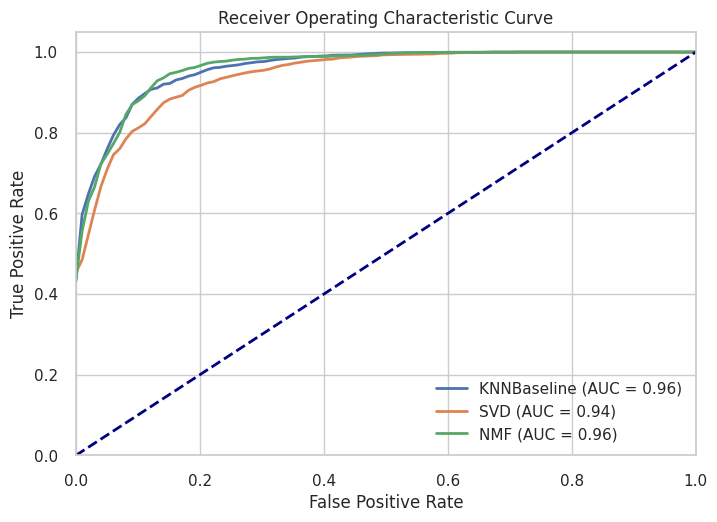

In [69]:
from collections import defaultdict
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from surprise import Reader, Dataset, KNNBaseline, SVD, NMF
from surprise.model_selection import KFold
import numpy as np

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = []
    recalls = []
    y_true = []
    y_scores = []

    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (est, true_r) in user_ratings[:k])

        precisions.append(n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0)
        recalls.append(n_rel_and_rec_k / n_rel if n_rel != 0 else 0)
        y_true.append(any(true_r >= threshold for (_, true_r) in user_ratings))
        y_scores.append(user_ratings[0][0] if user_ratings else 0)

    return precisions, recalls, y_true, y_scores

def plot_roc_curve(fpr, tpr, auc_score, label):
    """Plot ROC curve"""
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {auc_score:.2f})')

# Load your data
reader = Reader(rating_scale=(1, 5))  # Adjust the rating scale as needed
data = Dataset.load_from_df(final_df[['UserId', 'ProductId', 'Score']], reader)
kf = KFold(n_splits=5)

# Define the algorithms
algorithms = [KNNBaseline(), SVD(), NMF()]
algo_labels = ['KNNBaseline', 'SVD', 'NMF']

for algo, label in zip(algorithms, algo_labels):
    mean_fpr = np.linspace(0, 1, 100)
    tpr_sum = 0

    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precisions, recalls, y_true, y_scores = precision_recall_at_k(predictions, k=5, threshold=4)
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        tpr_sum += np.interp(mean_fpr, fpr, tpr)

    # Calculate the mean TPR across all folds
    mean_tpr = tpr_sum / kf.n_splits

    # Calculate AUC score
    auc_score = auc(mean_fpr, mean_tpr)

    # Plot the ROC curve
    plot_roc_curve(mean_fpr, mean_tpr, auc_score, label)

# Plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


Although we need to recommend three products on the product page, we will also assess how the model performs if more than three products were needed.

Let’s train our models.


Following our analysis, we have determined that the IBCF Euclidean algorithm yields the lowest RMSE value, signifying the least error in our recommendation model. As a result, it has been identified as the most effective recommendation model. The IBCF Pearson algorithm comes in second place based on our evaluation.

Get Recommendations:

For a specific user, get the items they haven't rated yet.

Use the trained model to predict ratings for these unrated items.
Recommend the items with the highest predicted ratings.